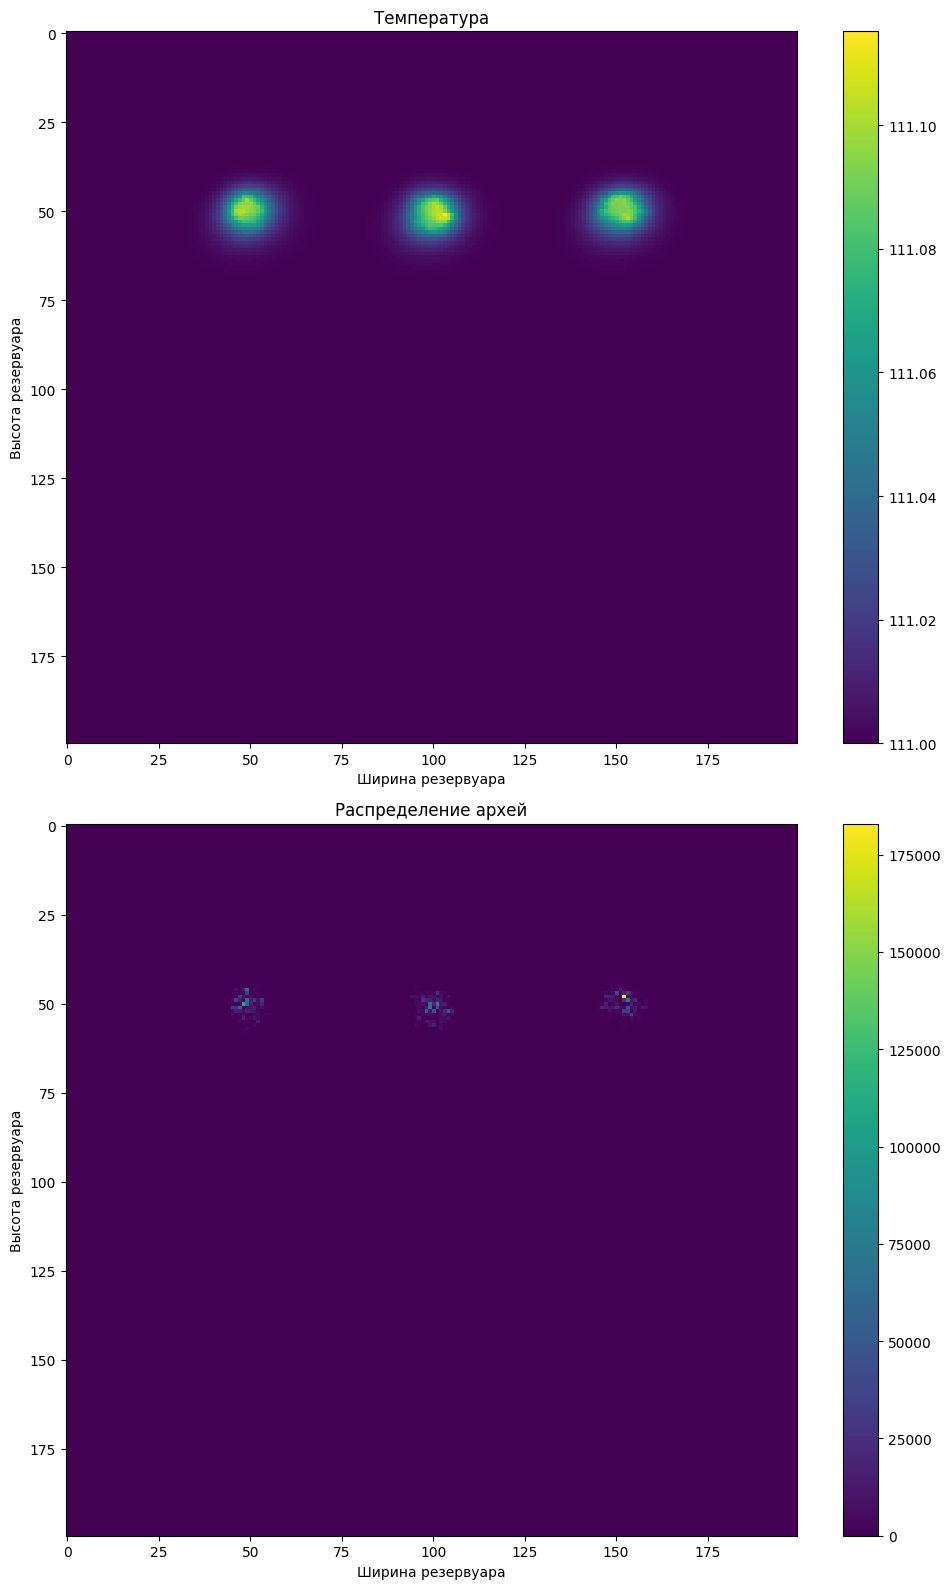

659.7455977678319


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Параметры
t0 = 20  # количество временных шагов
height = 20  # высота резервуара в метрах
P0 = 15.5 * 1e5  # начальное давление в паскалях (15.5 бар)
p1 = 950  # плотность нефти в кг/м³
g = 9.8  # ускорение свободного падения в м/с²
n0 = height**3 * 1000  # начальная концентрация веществ
eat = 1.2 * 10 ** (-4)  # скорость потребления в кг/(м³·с)
pa = 0.0018  # коэффициент роста
p2 = 0.717
a = 0.65
# Матрицы для различных параметров
matrix = np.zeros((height*10, height*10), float)  # давление
matrix1 = np.zeros((height*10, height*10), float)  # концентрация нефти
matrix2 = np.zeros((height*10, height*10), float)  # концентрация архей
matrix3 = np.zeros((height*10, height*10), float)  # концентрация метана
matrix_hot = np.zeros((height*10, height*10), float) # карта температуры

# Расчет давления и распределение архей с помощью гауссовского распределения
mean_pressure = 16 * 1e5  # среднее давление в паскалях (16 бар)
std_dev_pressure = 0.5 * 1e5  # стандартное отклонение (например, ±0.5 бар)

for i in range(len(matrix)):
    for j in range(len(matrix)):
        matrix[i, j] = P0 + p1 * g * ((height - (height - i / 10)))
        matrix1[i,j] = 200
        matrix_hot[i,j] = 111

matrix2[50,100] = 1000000
matrix2[50,50] = 1000000
matrix2[50,150] = 1000000

# Основной цикл по времени с учетом подъема метана и "смерти" архей
for t in range(t0): 
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix2[i,j]>0:
                d = random.choice([1,2,3,4])
                k = random.uniform(0,1)
                if d == 1 and i+1 < len(matrix):
                    matrix2[i+1, j] += matrix2[i,j] * k
                    matrix2[i,j] *= (1-k)
                elif d == 2 and j+1 < len(matrix):
                    matrix2[i, j+1] += matrix2[i,j] * k
                    matrix2[i,j] *= (1-k)
                elif d == 3 and i-1 >= 0:
                    matrix2[i-1, j] += matrix2[i,j] * k
                    matrix2[i,j] *= (1-k)
                elif d == 4 and j-1 >= 0:
                    matrix2[i, j-1] += matrix2[i,j] * k
                    matrix2[i,j] *= (1-k)

            archai_value = (norm.pdf(matrix[i, j], loc=mean_pressure, scale=std_dev_pressure)) * 100000
            food_value = (norm.pdf(matrix1[i,j], loc=200))
            tem_value = (norm.pdf(matrix_hot[i,j], loc=111))
            # Увеличение концентрации метана в верхней части резервуара 
            matrix2[i,j] *= (1 + pa * food_value * archai_value * tem_value) 
            matrix1[i,j] -= eat * food_value * matrix2[i, j] * archai_value * tem_value
            # Обновление температуры 
            matrix_hot[i,j] += eat ** 2 * food_value * matrix2[i, j] * archai_value * (5 / p2) * matrix1[i,j] * tem_value
            for di in [-1, 0, +1]:
                for dj in [-1, 0, +1]:
                    if di == dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    
                    if ni >= 0 and ni < len(matrix_hot) and nj >= 0 and nj < len(matrix_hot[0]):
                        heat_transfer = (matrix_hot[i,j] - matrix_hot[ni,nj]) * a
                        matrix_hot[ni,nj] += heat_transfer / 4   # Делим на количество направлений передачи тепла
                        matrix_hot[i,j] -= heat_transfer / 4
            
            matrix3[i, j] += archai_value * eat * food_value * matrix2[i, j]


# Визуализация результатов с использованием подграфиков для трех карт: температура, давление и концентрация архей.
fig, axs = plt.subplots(2, figsize=(10,16))

# График температуры 
c2 = axs[0].imshow(matrix_hot, cmap='viridis', aspect='auto')
axs[0].set_title("Температура")
axs[0].set_xlabel("Ширина резервуара")
axs[0].set_ylabel("Высота резервуара")
plt.colorbar(c2, ax=axs[0])

# График распределения архей 
c3 = axs[1].imshow(matrix2, cmap='viridis', aspect='auto')
axs[1].set_title("Распределение архей")
axs[1].set_xlabel("Ширина резервуара")
axs[1].set_ylabel("Высота резервуара")
plt.colorbar(c3, ax=axs[1])

plt.tight_layout()
plt.show()
print(np.sum(matrix3))

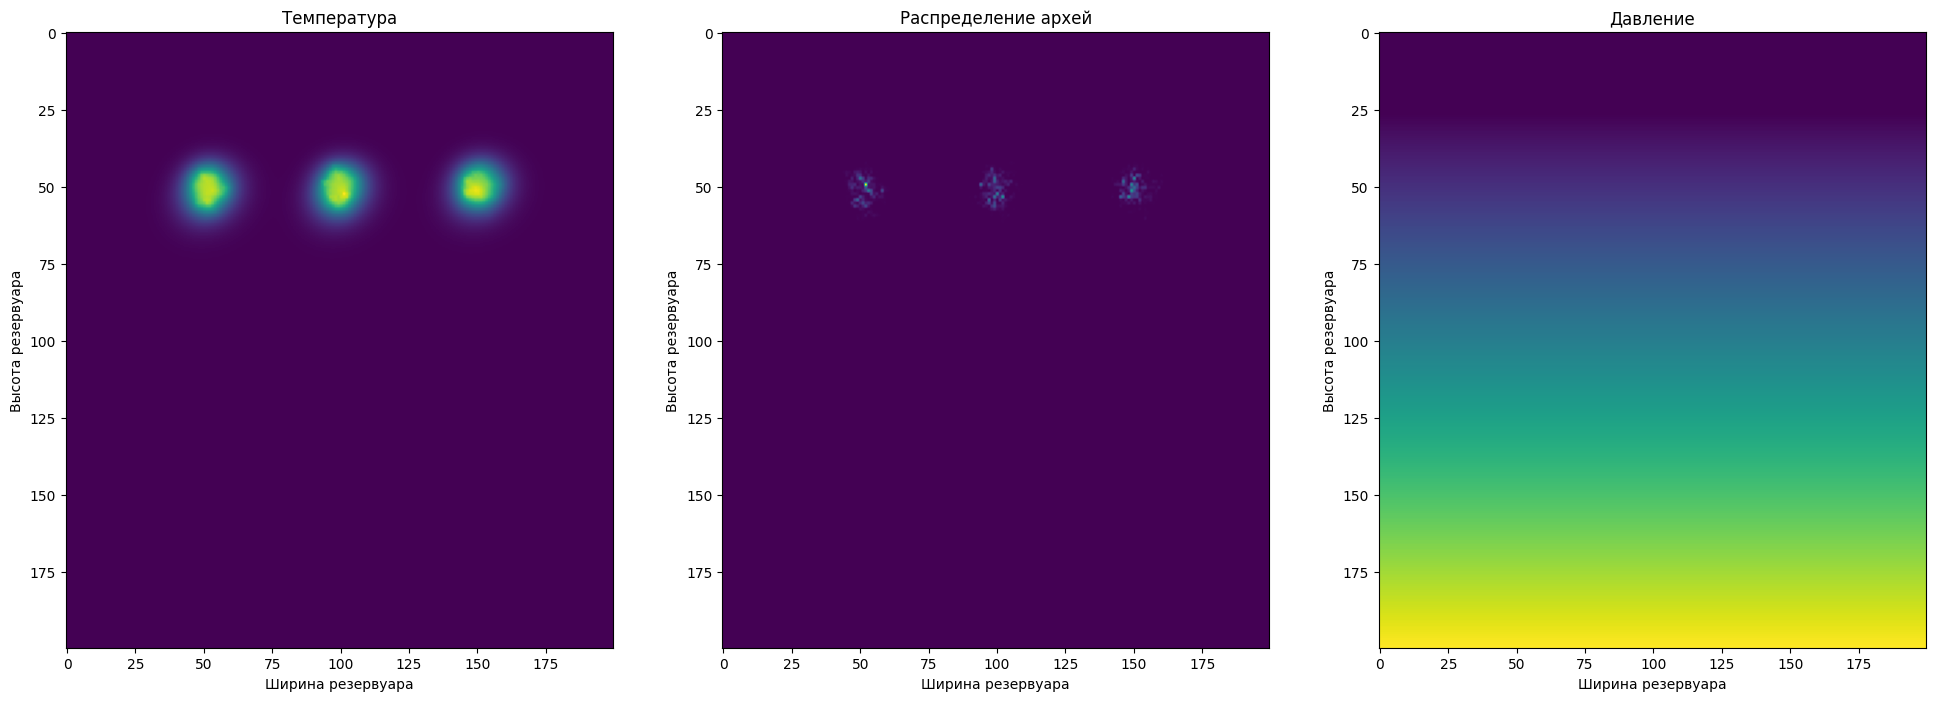

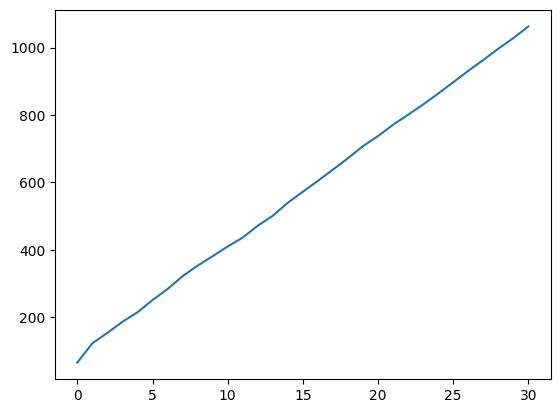

[]

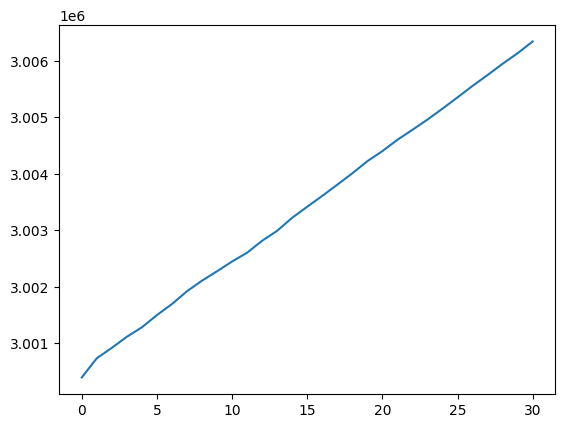

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from matplotlib.animation import FuncAnimation

# Параметры
t0 = 30  # количество временных шагов
initial_height = 20  # высота резервуара в метрах
P0 = 15.5 * 1e5  # начальное давление в паскалях (15.5 бар)
p1 = 950  # плотность нефти в кг/м³
g = 9.8  # ускорение свободного падения в м/с²
eat = 1.2 * 10 ** (-4)  # скорость потребления в кг/(м³·с)
pa = 0.0018  # коэффициент роста
height = initial_height
p2 = 0.717
a = 0.65
s = []
s1 = []

# Матрицы для различных параметров
matrix = np.zeros((initial_height*10, initial_height*10), float)  # давление
matrix1 = np.zeros((initial_height*10, initial_height*10), float)  # концентрация нефти
matrix2 = np.zeros((initial_height*10, initial_height*10), float)  # концентрация архей
matrix3 = np.zeros((initial_height*10, initial_height*10), float)  # концентрация метана
matrix_hot = np.zeros((initial_height*10, initial_height*10), float) # карта температуры

# Инициализация матриц
for i in range(len(matrix)):
    for j in range(len(matrix)):
        matrix1[i,j] = 200   # начальная концентрация нефти
        matrix_hot[i,j] = 111   # начальная температура

# Инициализация архей только в благоприятных областях (середина)
matrix2[50,100] = 1000000
matrix2[50,50] = 1000000
matrix2[50,150] = 1000000

# Создание фигуры для анимации
fig, axs = plt.subplots(1, 3, figsize=(24,8))

def update(frame):
    global matrix2, matrix1, matrix3, height, s, s1 
    h_sum = np.sum(matrix3) / (height * height) if height > 0 else 0
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            h0 = height - (height - (i / 10))
            if h0 < h_sum:
                matrix[i,j] = P0 + p2 * g * h0
            else:
                matrix[i,j] = P0 + p1 * g * (h0 - h_sum) + p2 * g * h_sum
            
            if matrix2[i,j] > 0:
                d = random.choice([1,2,3,4])
                k = random.uniform(0,1)
                if d == 1 and i+1 < len(matrix):
                    matrix2[i+1,j] += matrix2[i,j] * k   
                    matrix2[i,j] *= (1-k)
                elif d == 2 and j+1 < len(matrix):
                    matrix2[i,j+1] += matrix2[i,j] * k   
                    matrix2[i,j] *= (1-k)
                elif d == 3 and i-1 >= 0:
                    matrix2[i-1,j] += matrix2[i,j] * k   
                    matrix2[i,j] *= (1-k)
                elif d == 4 and j-1 >= 0:
                    matrix2[i,j-1] += matrix2[i,j] * k   
                    matrix2[i,j] *= (1-k)

            archai_value = (norm.pdf(matrix[i, j], loc=16 * 1e5, scale=0.5 * 1e5)) * 100000
            
            food_value = (norm.pdf(matrix1[i,j], loc=200))
            tem_value = (norm.pdf(matrix_hot[i,j], loc=111))
            
            # Увеличение концентрации метана в верхней части резервуара 
            growth_factor = pa * food_value * archai_value * tem_value 
            matrix2[i,j] *= (1 + growth_factor) 
            matrix1[i,j] -= eat * food_value * matrix2[i, j] * archai_value * tem_value
            
            # Обновление температуры 
            temperature_increase = eat ** 2 * food_value * matrix2[i, j] * archai_value * (5 / p2) * matrix1[i,j] * tem_value
            matrix_hot[i,j] += temperature_increase
            
            for di in [-1, 0, +1]:
                for dj in [-1, 0, +1]:
                    if di == dj == 0:
                        continue
                    
                    ni, nj = i + di, j + dj
                    
                    if ni >= 0 and ni < len(matrix_hot) and nj >= 0 and nj < len(matrix_hot[0]):
                        heat_transfer = (matrix_hot[i,j] - matrix_hot[ni,nj]) * a
                        matrix_hot[ni,nj] += heat_transfer / 4   # Делим на количество направлений передачи тепла
                        matrix_hot[i,j] -= heat_transfer / 4
            
            matrix3[i, j] += archai_value * eat * food_value * matrix2[i, j]


    axs[0].imshow(matrix_hot, cmap='viridis', aspect='auto')
    axs[0].set_title("Температура")
    axs[0].set_xlabel("Ширина резервуара")
    axs[0].set_ylabel("Высота резервуара")

    axs[1].imshow(matrix2, cmap='viridis', aspect='auto')
    axs[1].set_title("Распределение архей")
    axs[1].set_xlabel("Ширина резервуара")
    axs[1].set_ylabel("Высота резервуара")

    axs[2].imshow(matrix, cmap='viridis', aspect='auto')
    axs[2].set_title("Давление")
    axs[2].set_xlabel("Ширина резервуара")
    axs[2].set_ylabel("Высота резервуара")

    height -= h_sum / (1000)   # Корректировка уменьшения высоты для предотвращения отрицательных значений
    s.append(np.sum(matrix3)) 
    s1.append(np.sum(matrix2))
# Создание анимации для концентрации архей и температуры.
ani_concentration_archea = FuncAnimation(fig, update, frames=t0)
ani_concentration_archea.save('concentration_archea.gif', writer='pillow')

plt.show()
plt.plot(s)
plt.show()
plt.plot(s1)
plt.plot()